In [65]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

# v c m p
from keras_visualizer import visualizer
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [67]:
colnames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv('pima-indians-diabetes.csv',header=None, names=colnames)
df.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
x = df.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [69]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [70]:
scaler = StandardScaler()

In [71]:
#mean 0 and variance 1 krta h sbka
x = scaler.fit_transform(x)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
model = Sequential()

# input layer me - features (8)
# 1 inside shape means all features and 0 means rows
model.add(Input(shape=(x.shape[1],)))

#hidden layer
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # 0 1 classifies - output layer

In [74]:
#compiling of model


In [75]:

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,callbacks=[early_stop])

visualizer(model,file_format='png',view=True)

plot_model(model, to_file='Neural.png', show_layer_names=True)

_,accuracy = model.evaluate(x_test,y_test)
accuracy

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6897 - loss: 0.6159 - val_accuracy: 0.6883 - val_loss: 0.6079
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7335 - loss: 0.5639 - val_accuracy: 0.6753 - val_loss: 0.5760
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7257 - loss: 0.5390 - val_accuracy: 0.7338 - val_loss: 0.5551
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.5021 - val_accuracy: 0.7468 - val_loss: 0.5467
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7592 - loss: 0.4808 - val_accuracy: 0.7597 - val_loss: 0.5430
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 0.4774 - val_accuracy: 0.7597 - val_loss: 0.5416
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7648 - loss: 0.4803 - val_accuracy: 0.7532 - val_loss: 0.5407
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.4653 - val_accuracy: 0.7532 - 

0.7467532753944397

In [76]:
train_loss, train_accur = model.evaluate(x_train,y_train)
train_accur*100

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.4480


77.85016298294067

In [78]:
test_loss, test_accur = model.evaluate(x_test,y_test)
test_accur*100

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.5299


74.67532753944397

In [79]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

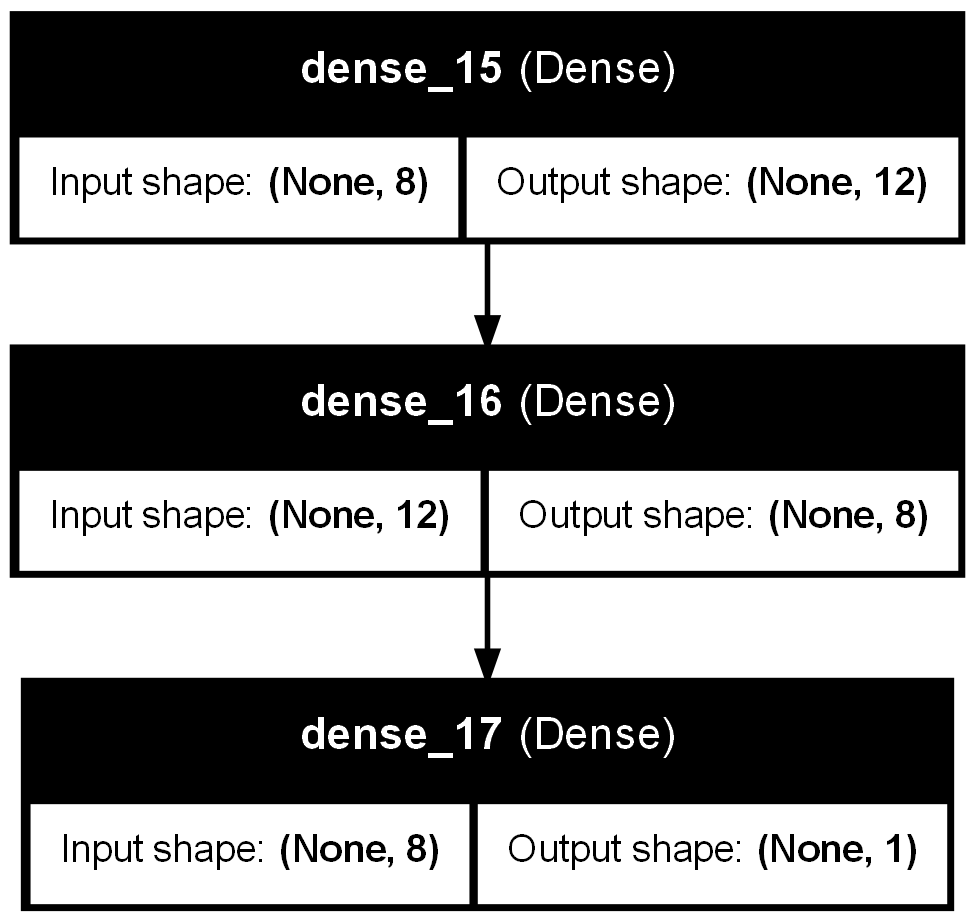

In [80]:
plot_model(model,to_file='Neural.png',show_shapes=True, show_layer_names=True)

In [82]:
def userInput():
    print("Please enter the following details:")
    pregnancies = float(input("Number of pregnancies: "))
    glucose = float(input("Glucose level: "))
    blood_pressure = float(input("Blood pressure: "))
    skin_thickness = float(input("Skin thickness: "))
    insulin = float(input("Insulin level: "))
    bmi = float(input("BMI: "))
    diabetes_pedigree = float(input("Diabetes Pedigree Function: "))
    age = float(input("Age: "))
    
    user_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, 
                           insulin, bmi, diabetes_pedigree, age]])
    user_data = scaler.transform(user_data)  
    return user_data

def predict():
    user_data = userInput()
    prediction = model.predict(user_data)
    
    if prediction >= 0.5:
        print("The model predicts that you are diabetic.")
    else:
        print("The model predicts that you are not diabetic.")
    
predict()    

Please enter the following details:
Number of pregnancies: 3
Glucose level: 90
Blood pressure: 66
Skin thickness: 30
Insulin level: 1
BMI: 33
Diabetes Pedigree Function: 0.334
Age: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The model predicts that you are not diabetic.
